# Определение перспективного тарифа телеком компании
<br>
<br>

**<font size='4'>Исходные данные  </font>**   <font color=#708090> <br><br>
«Мегалайн» — федеральный оператор сотовой связи. Продает клинетам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, нужно определить, какой тариф приносит больше денег. Предоставлены данные небольшой выборки клиентов за 2018 год.  В данных 500 клиентов использовавших указанные выше тарифы. Информация о клиентах содержит: кто они, откуда, каким тарифом пользуются, сколько звонков и соощений каждый отправил.</font>

<br>

**<font size='4'>Цель проекта:</font>** 
<font color=#708090>
Проанализировать поведение клиентов и сделать вывод — какой тариф приносит больше денег. </font>
<br>
<br>
***
<font size='3'>Описание тарифов</font>


Тариф «Смарт»
<font color=#708090>
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика 
3. Стоимость услуг сверх тарифного пакета: 1.минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.</font>

Тариф «Ультра»
<font color=#708090>
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
</font>

<br>
<br>
<dfn>Примечание: </dfn>
<font size='2' color=#708090><dfn>
    «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.</dfn></font>
<br>
<br>
<br>
<br>

<font size='5'>Описание данных</font>


Таблица users (информация о пользователях):
<br>
<font color=#708090>
<li>user_id — уникальный идентификатор пользователя</li>
<li>first_name — имя пользователя</li>
<li>last_name — фамилия пользователя</li>
<li>age — возраст пользователя (годы)</li>
<li>reg_date — дата подключения тарифа (день, месяц, год)</li>
<li>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</li>
<li>city — город проживания пользователя</li>
<li>tarif — название тарифного плана</li>
</font>
<br>
Таблица calls (информация о звонках):
<br>
<font color=#708090>
<li>id — уникальный номер звонка</li>
<li>call_date — дата звонка</li>
<li>duration — длительность звонка в минутах</li>
<li>user_id — идентификатор пользователя, сделавшего звонок</li>
</font>
<br>
Таблица messages (информация о сообщениях):
<br>
<font color=#708090>
<li>id — уникальный номер сообщения</li>
<li>message_date — дата сообщения</li>
<li>user_id — идентификатор пользователя, отправившего сообщение</li>
</font>
<br>
Таблица internet (информация об интернет-сессиях):
<br>
<font color=#708090>
<li>id — уникальный номер сессии</li>
<li>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)</li>
<li>session_date — дата интернет-сессии</li>
<li>user_id — идентификатор пользователя</li>
</font>
<br>
Таблица tariffs (информация о тарифах):
<br>
<font color=#708090>
<li>tariff_name — название тарифа</li>
<li>rub_monthly_fee — ежемесячная абонентская плата в рублях</li>
<li>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату</li>
<li>messages_included — количество сообщений в месяц, включённых в абонентскую плату</li>
<li>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</li>
<li>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</li>
<li>rub_per_message — стоимость отправки сообщения сверх тарифного пакета</li>
<li>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</li>
</font>



## Загрузка и изучение общей информации датасета

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

<font size='2' color=#708090>
<br>
</font>

In [2]:
# Отключим scientific notation 
# Изменим и проверим количество отображаемых столбцов

pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.options.display.max_columns=50
pd.get_option("display.max_columns")

50

<font size='2' color=#708090></font>

In [3]:
# Читаем файлы с данными

df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')

### Изучим загруженные датасеты

In [4]:
# Просматриваем датасет с информацией о звонках
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000000,1000
1,1000_1,2018-08-17,0.000000,1000
2,1000_2,2018-06-11,2.850000,1000
3,1000_3,2018-09-21,13.800000,1000
4,1000_4,2018-12-15,5.180000,1000
5,1000_5,2018-11-02,0.000000,1000
6,1000_6,2018-10-18,0.000000,1000
7,1000_7,2018-08-22,18.310000,1000
8,1000_8,2018-09-15,18.440000,1000
9,1000_9,2018-08-15,0.000000,1000


In [5]:
#df_calls['duration'].plot(kind='hist', bins = 39, color="dodgerblue", figsize=(10, 5))

In [6]:
# Просматриваем датасет с информацией об интернет сессиях
df_internet.info()
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950000,2018-11-25,1000
1,1,1000_1,1052.810000,2018-09-07,1000
2,2,1000_2,1197.260000,2018-06-25,1000
3,3,1000_3,550.270000,2018-08-22,1000
4,4,1000_4,302.560000,2018-09-24,1000
5,5,1000_5,399.970000,2018-10-02,1000
6,6,1000_6,540.080000,2018-09-07,1000
7,7,1000_7,415.700000,2018-07-11,1000
8,8,1000_8,505.400000,2018-10-08,1000
9,9,1000_9,345.540000,2018-09-03,1000


In [7]:
#df_internet['mb_used'].plot(kind='hist', bins = 39, color="dodgerblue", figsize=(10, 5))

In [8]:
# Просматриваем датасет с информацией о сообщениях
df_messages.info()
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
# Просматриваем датасет с информацией о тарифах
df_tariffs.info()
df_tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
# Просматриваем датасет с информацией о пользователях
df_users.info()
df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


***
### Вывод
Определили объём и формат данных:
* 500 клиентов
* 202607 звонков
* 149396 интернет сессий
* 123036 сообщений

> *Пропущенные значения отсутствуют (кроме параметра churn_date в таблице users, который принимает значение NaN, если тариф действующий)*



В датасете **df_calls** с информацией о звонках столбец с датой звонка имет неверный тип данных - строчный.
Также столбец с длительностью звонка стоит округлить в соответсвии с условиями тарифов.
<br>
<br>
В датасете **df_internet** с информацией об интернет трафике есть ненужный столбец 'unnamed 0', повторяющий индексы. Аналогично - неверный тип данныху столбца со временем. Данные в столбце с использованными мегабайтами стоит округлить в соответсвии с условием тарифов.
<br>
<br>
В датасете **df_messages** с информацией о сообщениях у даты неверный тип данных.
<br>
<br>
В датасете **df_users** с информацией о пользователях имеются пропуски в дате прекращения пользования тарифом, связано с тем, что на момент извлечения данных клиент продолжал пользоваться тарифом. У даты регистрации тоже неверный формат данных.



## Предобработка данных

### Замена типов данных, обнаружение ошибок, проверка дубликатов.

<br>
<br>
<font size='4' color=#708090>Обработаем таблицу calls (информация о звонках)</font>

In [11]:
# Преобразуем столбец call_date к типу datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

In [12]:
# По условиям тарифа округлим до бо́льшего целого значения израсходованный трафик в каждой сессии
df_calls.loc[:, 'duration'] = df_calls.loc[:, 'duration'].apply(lambda x: math.ceil(x))

In [13]:
# Создадим столбец с месяцом
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head(2)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8


In [14]:
#Посмотрим количество звонков со значением 0
df_calls[df_calls['duration'] == 0.0].shape[0]

39613

Длительность 19.5% звонков — 0.0 минут. Это могут быть пропущенные звонки либо звонки, когда клиент не дозвонился до адресата. Оставим их как есть. К тому же, они никак не повлияют на сумму использованных минут.

In [15]:
# Проверяем на наличие дубликатов
df_calls.duplicated().sum()

0

<br>
<br>
<font size='4' color=#708090>Обработаем таблицу internet (информация об интернет-сессиях)
</font>

In [16]:
# Удалим столбец дублирующий индекс 'Unnamed: 0'
del df_internet['Unnamed: 0']

In [17]:
# Преобразуем столбец session_date к типу datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')

In [18]:
# По условиям тарифа округлим до бо́льшего целого значения израсходованный трафик в каждой сессии
df_internet.loc[:, 'mb_used'] = df_internet.loc[:, 'mb_used'].apply(lambda x: math.ceil(x))

In [19]:
# Cоздадим столбец с месяцом
df_internet['month'] = df_internet['session_date'].dt.month

In [20]:
df_internet.head(2)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9


In [21]:
# Проверим есть ли строки с 0 значением использованного трафика
df_internet[df_internet['mb_used'] == 0.0].shape[0]

19598

Сессий с нулевым объёмом трафика около 13% от общего количества. Нулевой объём трафика может быть связан с отсутствием интернет соединения, или отменой сессии до начала передачи трафика. Оставим данные как есть.

In [22]:
# проверяем на наличие дубликатов
df_internet.duplicated().sum()

0

<br>
<br>
<font size='4' color=#708090>Обработаем таблицу messages (информация о сообщениях)</font>

In [23]:
# Преобразуем столбец message_date к типу datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')

In [24]:
# Создадим столбец с месяцом
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head(2)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10


In [25]:
# проверяем на наличие дубликатов
df_messages.duplicated().sum()

0

<br>
<br>
<font size='4' color=#708090>Обработаем таблицу tariffs (информация о тарифах)</font>

In [26]:
# Имеется всего 2 строки (2 тарифа), отсутствуют пропущенные значения и установленные типы данных правильные

df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<br>
<br>
<font size='4' color=#708090>Обработаем таблицу users (информация о пользователях)</font>

In [27]:
# переводим столбцы 'churn_date' и 'reg_date' в df_users к нужному формату:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

# проверяем
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Пропущенные значения в 'churn_date' означают, что тариф еще действовал на момент выгрузки данных. Удалять не будем. 

In [28]:
# проверяем на наличие дубликатов
df_users.duplicated().sum()

0

In [29]:
# Выведем получившиеся размеры датасетов после обработки

len_dataframes = pd.Series(
    data=[df_users.shape[0], df_calls.shape[0], df_internet.shape[0], df_messages.shape[0]],
    index=['users', 'calls', 'internet', 'messages']
)
len_dataframes

users          500
calls       202607
internet    149396
messages    123036
dtype: int64

**<font size='4'>Вывод</font>**
     
* Выполнено преобразование типов данных в столбцах с датами в формат дат для всех датафреймов.
* Выполнено округление длительности звонков в большую сторону с учетом особенности, что разговор в 1 секунду округляется до минуты, и преобразовано в целочисленные значения.
* Обнаружены звонки длительностью 0 минут. Принято оставить эти звонки в датафрейме и посмотреть как они повлияют на анализ в дальнейшем.
* Округлили объем интернет сессий в бо́льшую сторону и привели значение к целочисленному. 
* Удален столбец дублирующий индекс из данных по интернет трафику.

### Расчёт дополнительных параметров


<br>
<br>
<font size='4' color=#708090>Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам</font>

In [30]:
# Cгруппируем данные по месяцам для расчёта кол-ва звонков и минут
calls_month = df_calls.groupby(['user_id','month'])[['duration']].agg(['count','sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
calls_month

,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [31]:
# Проверим совпадает ли общая длительность звонков изначальной и сгруппрованной таблицы
sum(df_calls['duration']) == sum(calls_month['calls_duration'])


True

In [32]:
# Проверим совпадает ли количество звонков изначальной и сгруппированной таблицы
df_calls.shape[0] == sum(calls_month['calls_count'])

True

In [33]:
print('Общее коли-во истраченных минут:', sum(df_calls['duration']), ', кол-во звонков:', df_calls.shape[0])
print('Общее коли-во истраченных минут:', sum(calls_month['calls_duration']), ', кол-во звонков:', sum(calls_month['calls_count']))

Общее коли-во истраченных минут: 1450301 , кол-во звонков: 202607
Общее коли-во истраченных минут: 1450301 , кол-во звонков: 202607


<br>
<br>
<font size='4' color=#708090>Посчитаем количество отправленных сообщений по месяцам</font>

In [34]:
# Cгруппируем данные по месяцам для расчёта кол-ва sms
messages_month = df_messages.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
messages_month.columns = ['user_id', 'month', 'messages']
messages_month

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [35]:
df_messages.shape[0] == sum(messages_month['messages'])

True

<br>
<br>
<font size='4' color=#708090>Посчитаем объём израсходованного интернет-трафика по месяцам</font>

In [36]:
# Cгруппируем данные по месяцам для расчёта кол-ва использованных mb
internet_month = df_internet.groupby(['user_id','month'])[['mb_used']].agg(['sum']).reset_index()
internet_month.columns = ['user_id', 'month', 'mb_used']
internet_month

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3198,1498,10,20604
3199,1499,9,1848
3200,1499,10,17809
3201,1499,11,17984


In [37]:
sum(df_internet['mb_used']) == sum(internet_month['mb_used'])

True

In [38]:
print(sum(df_internet['mb_used']))
print(sum(internet_month['mb_used']))

55369459
55369459


In [39]:
# Переведем мегабайты в гигабайты в соответсвии с требованиями тарифа. Округлим полученные гигабайты в бо́льшую сторону.
mb_in_gb = 1024
internet_month['gb_used'] = (internet_month['mb_used'] / mb_in_gb).apply(np.ceil).astype('int')

In [40]:
internet_month.head()

,user_id,month,mb_used,gb_used
0,1000,5,2256,3
1,1000,6,23257,23
2,1000,7,14016,14
3,1000,8,14070,14
4,1000,9,14581,15


<br>
<br>
<font size='4' color=#708090>Посчитаем помесячную выручку с каждого пользователя</font>

In [41]:
# Посмотрим параметры тарифов
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [42]:
# Выполним слияние таблиц по звонкам, сообщениям и интернет-трафику в одну общую таблицу
merged_table = pd.merge(calls_month, messages_month, how='outer', on=['user_id', 'month'])
merged_table = pd.merge(merged_table, internet_month, how='outer', on=['user_id', 'month'])
merged_table

,user_id,month,calls_count,calls_duration,messages,mb_used,gb_used
0,1000,5,22.000000,159.000000,22.000000,2256.000000,3.000000
1,1000,6,43.000000,172.000000,60.000000,23257.000000,23.000000
2,1000,7,47.000000,340.000000,75.000000,14016.000000,14.000000
3,1000,8,52.000000,408.000000,81.000000,14070.000000,14.000000
4,1000,9,58.000000,466.000000,57.000000,14581.000000,15.000000
...,...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.000000,17232.000000,17.000000
3210,1489,10,nan,nan,21.000000,19588.000000,20.000000
3211,1489,11,nan,nan,20.000000,17516.000000,18.000000
3212,1489,12,nan,nan,35.000000,17341.000000,17.000000


In [43]:
# Добавим в таблицу merged_table столбцы с тарифом и городом для все строк пользователей
df_full = pd.merge(merged_table, df_users[['user_id', 'tariff', 'city']], how='left', on=['user_id'])
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,gb_used,tariff,city
0,1000,5,22.000000,159.000000,22.000000,2256.000000,3.000000,ultra,Краснодар
1,1000,6,43.000000,172.000000,60.000000,23257.000000,23.000000,ultra,Краснодар
2,1000,7,47.000000,340.000000,75.000000,14016.000000,14.000000,ultra,Краснодар
3,1000,8,52.000000,408.000000,81.000000,14070.000000,14.000000,ultra,Краснодар
4,1000,9,58.000000,466.000000,57.000000,14581.000000,15.000000,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.000000,17232.000000,17.000000,smart,Санкт-Петербург
3210,1489,10,nan,nan,21.000000,19588.000000,20.000000,smart,Санкт-Петербург
3211,1489,11,nan,nan,20.000000,17516.000000,18.000000,smart,Санкт-Петербург
3212,1489,12,nan,nan,35.000000,17341.000000,17.000000,smart,Санкт-Петербург


In [44]:
# Заполним пропуски в столбцах нулями
df_full[['calls_count', 'calls_duration', 'messages', 'mb_used', 'gb_used']] = df_full[['calls_count', 'calls_duration', 'messages', 'mb_used', 'gb_used']].fillna(0.0).astype('int')
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,gb_used,tariff,city
0,1000,5,22,159,22,2256,3,ultra,Краснодар
1,1000,6,43,172,60,23257,23,ultra,Краснодар
2,1000,7,47,340,75,14016,14,ultra,Краснодар
3,1000,8,52,408,81,14070,14,ultra,Краснодар
4,1000,9,58,466,57,14581,15,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17232,17,smart,Санкт-Петербург
3210,1489,10,0,0,21,19588,20,smart,Санкт-Петербург
3211,1489,11,0,0,20,17516,18,smart,Санкт-Петербург
3212,1489,12,0,0,35,17341,17,smart,Санкт-Петербург


<br>
<br>
<font size='4' color=#708090>Посчитаем выручку с каждого клиента за каждый месяц и добавим в общую таблицу</font>

In [45]:
# Функция возвращает значение выручки в зависимости от тарифа (какой-то жуткий монстр)
# Считается стоимость потраченных минут/сообщений/трафика сверх тарифа и прибавляется базовая стоимость тарифа
def calc_earnings(row):
    tariff_cond = df_tariffs['tariff_name'] == row['tariff']
    
    return (
    max(0, row['calls_duration'] - df_tariffs.loc[tariff_cond, 'minutes_included'].iloc[0]) * df_tariffs.loc[tariff_cond, 'rub_per_minute'].iloc[0]
    + max(0, row['messages'] - df_tariffs.loc[tariff_cond, 'messages_included'].iloc[0]) * df_tariffs.loc[tariff_cond, 'rub_per_message'].iloc[0]
    + max(0, row['mb_used'] - df_tariffs.loc[tariff_cond, 'mb_per_month_included'].iloc[0]) * (df_tariffs.loc[tariff_cond, 'rub_per_gb'].iloc[0] / 1024.0)
    + df_tariffs.loc[tariff_cond, 'rub_monthly_fee'].iloc[0]
    )

In [46]:
df_full['earnings'] = df_full.apply(calc_earnings, axis=1)
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,gb_used,tariff,city,earnings
0,1000,5,22,159,22,2256,3,ultra,Краснодар,1950.000000
1,1000,6,43,172,60,23257,23,ultra,Краснодар,1950.000000
2,1000,7,47,340,75,14016,14,ultra,Краснодар,1950.000000
3,1000,8,52,408,81,14070,14,ultra,Краснодар,1950.000000
4,1000,9,58,466,57,14581,15,ultra,Краснодар,1950.000000
...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17232,17,smart,Санкт-Петербург,915.625000
3210,1489,10,0,0,21,19588,20,smart,Санкт-Петербург,1375.781250
3211,1489,11,0,0,20,17516,18,smart,Санкт-Петербург,971.093750
3212,1489,12,0,0,35,17341,17,smart,Санкт-Петербург,936.914062


**Выводы:**


- округлили до бо́льшего целого длительность звонков и количество потраченных мегабайт
- привели даты к типу datetime
- посчитали для каждого клиента за каждый месяц объем израсходованного трафика, количество минут разговора и количествои смс
- обединили данные в итоговую таблицу в которой посчитали потраченные клиентом деньги за каждый месяц



## Анализ данных

Анализ поведения клиентов исходя из имеющейся выборки


<br>
<br>
<font size='4' color=#708090>Посчитаем среднее количество, дисперсию и стандартное отклонение по минутам разговора, кол-ву сообщений и объёму интернет-трафика</font>


In [47]:
table_smart = pd.DataFrame(index=['mean', 'var', 'std'], columns=['calls_duration','messages','mb_used'])

for clmn in table_smart.columns:
    table_smart.loc['mean',clmn] = df_full.loc[df_full['tariff'] == 'smart', clmn].mean()
    table_smart.loc['var', clmn] = np.var(df_full.loc[df_full['tariff'] == 'smart', clmn])
    table_smart.loc['std', clmn] = np.sqrt(np.var(df_full.loc[df_full['tariff'] == 'smart', clmn]))
    
table_smart

,calls_duration,messages,mb_used
mean,417.934948,33.384029,16229.188425
var,36203.066652,796.455483,34530412.737040
std,190.271035,28.221543,5876.258396


In [48]:
table_ultra = pd.DataFrame(index=['mean', 'var', 'std'], columns=['calls_duration','messages','mb_used'])

for clmn in table_ultra.columns:
    table_ultra.loc['mean',clmn] = df_full.loc[df_full['tariff'] == 'ultra', clmn].mean()
    table_ultra.loc['var', clmn] = np.var(df_full.loc[df_full['tariff'] == 'ultra', clmn])
    table_ultra.loc['std', clmn] = np.sqrt(np.var(df_full.loc[df_full['tariff'] == 'ultra', clmn]))
    
table_ultra

,calls_duration,messages,mb_used
mean,526.623350,49.363452,19486.901523
var,100771.223617,2282.946075,101832133.108069
std,317.444836,47.780185,10091.190867


Соединим данные в сводную таблицу

In [49]:
df_full.pivot_table(index='tariff', values=['calls_duration','messages','mb_used'], aggfunc=['mean', np.var, np.std]).transpose()

tariff                        smart            ultra
mean calls_duration      417.934948       526.623350
     mb_used           16229.188425     19486.901523
     messages             33.384029        49.363452
var  calls_duration    36219.315784    100873.633397
     mb_used        34545911.126958 101935621.048219
     messages            796.812958      2285.266143
std  calls_duration      190.313730       317.606098
     mb_used            5877.576978     10096.317202
     messages             28.227876        47.804457

**Посмотрим соотношение пользователей тарифов**

In [50]:
df_full.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,2229
ultra,985


Text(0.02, -0.5, 'Количество клиентов с тарифом "Ультра": 29.8%')

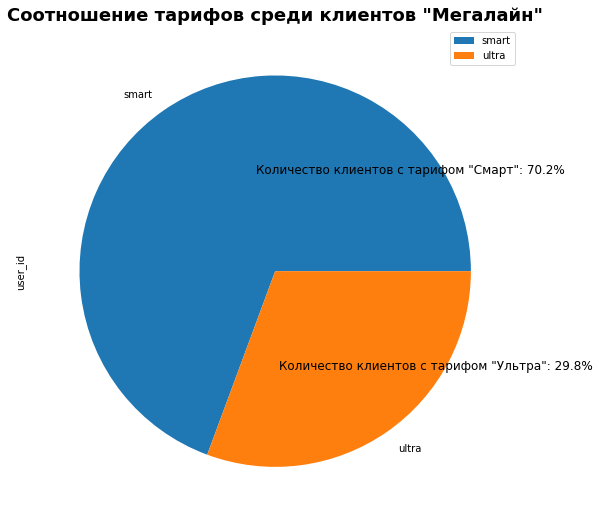

In [51]:
# посчитаем процентное соотношение тарифов между клиентами.
smart_percent = df_users['user_id'][df_users['tariff'] == 'smart'].count() / df_users['user_id'].count()
ultra_percnet = df_users['user_id'][df_users['tariff'] == 'ultra'].count() / df_users['user_id'].count()

# текстовые сообщения
smart_perncent_text = 'Количество клиентов с тарифом "Смарт": {:.1%}'.format(smart_percent)
ultra_percnet_text = 'Количество клиентов с тарифом "Ультра": {:.1%}'.format(ultra_percnet)

#строим круговую диаграмму
df_full.pivot_table(index='tariff', values='user_id', aggfunc='count').plot(y='user_id', kind='pie', figsize =(15, 9))
plt.title('Соотношение тарифов среди клиентов "Мегалайн"', fontsize = 18, fontweight = 'bold')
plt.text(-0.1, 0.5, smart_perncent_text, fontsize=12)
plt.text(0.02, -0.5, ultra_percnet_text, fontsize=12)


**Построим гистограммы по услугам для тарифов**

In [52]:
# Функция построения гистограммы
def plot_my_hist(data=None, index=None, value=None, custom_bins=None):
    """Plot custom histogram"""
    plt.figure(figsize=(14,6))
    plt.title('Histogram of '+value, fontsize=16)
    plt.xlabel(value, fontsize=14)
    plt.ylabel("count", fontsize=14)
    if custom_bins == None:
        bins=50
    else:
        bins=custom_bins
    for i in data[index].unique():
        plt.hist(data.loc[data[index] == i, value], bins=bins, alpha=0.7)
    plt.grid(True)
    plt.legend(data[index].unique(), loc='best', fontsize=14)
    #plt.show()


<br>
<br>
<font size='4' color=#708090>Сторим гистограммы по звонкам</font>

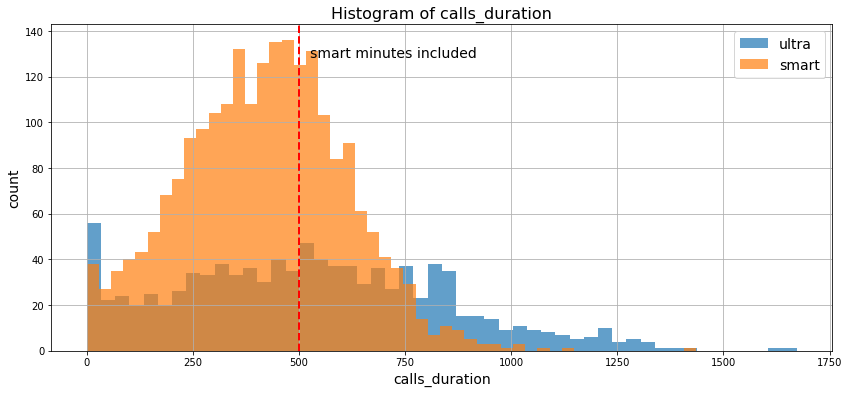

In [53]:

plot_my_hist(df_full, index='tariff', value='calls_duration')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'minutes_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'minutes_included'].iloc[0]*1.05, max_ylim*0.9, 'smart minutes included', fontsize=14)
plt.show()

Большая часть клиентов перерасходует лимит минут звонков на тарифе SMART. Лимит на тарифе ULTRA не будем отображать на графике так как все (или почти все) клиенты укладываются в лимит звонков предоставляюемый тарифом.

<br>
<br>
<font size='4' color=#708090>Сторим гистограммы по сообщениям</font>

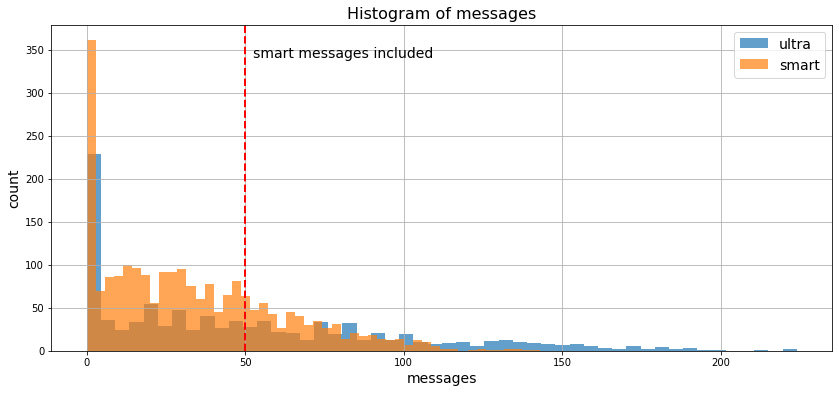

In [54]:
plot_my_hist(df_full, index='tariff', value='messages')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'messages_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'messages_included'].iloc[0]*1.05, max_ylim*0.9, 'smart messages included', fontsize=14)
plt.show()

Пользователи тарифа SMART довольно часто пользуются сообщениями сверх лимита. Пользователи тарифа ULTRA укладываются в тариф.

<br>
<br>
<font size='4' color=#708090>Сторим гистограммы по интернет-трафику</font>

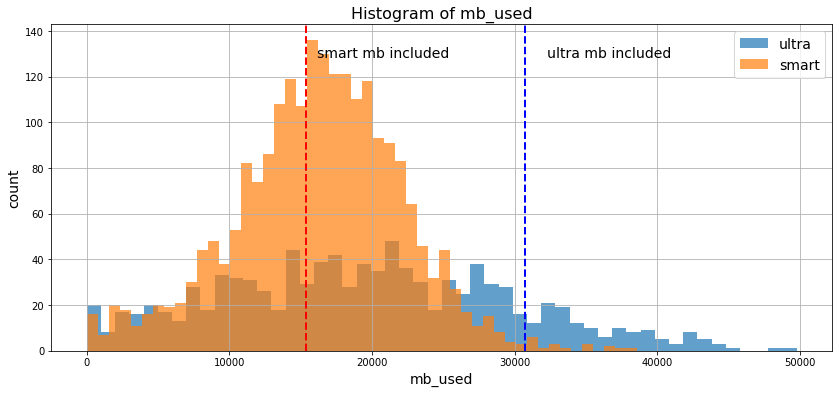

In [55]:
plot_my_hist(df_full, index='tariff', value='mb_used')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].iloc[0]*1.05, max_ylim*0.9, 'smart mb included', fontsize=14)
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].iloc[0], color='b', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].iloc[0]*1.05, max_ylim*0.9, 'ultra mb included', fontsize=14)
plt.show()

Клиенты переплачивают за используемый интернет, особенно это заметно на тарифе SMART (более половины перерасходует лимит трафика).

**Вывод:**

- Пользователи тарифа ULTRA в среднем больше пользуются всеми услугами связи.
- Разброс по использованию услуг связи на тарифе ULTRA выше, чем на тарифе smart. Велика вероятность, что отдельно взятый клиент на тарифе ULTRA пользуется услугами связи меньше, чем отдельной взятый клиент на тарифе SMART. Но нужно отметить, что в выборке пользователей тарифа SMART более, чем в 2 раза больше, чем пользователей тарифы ULTRA, поэтому может быть данные по тарифу ULTRA менее репрезентативны.
- Видны всплески на графиках около нуля по продолжительности звонков и, особенно, по количеству смс. Заметная часть пользователей пользуется только интернетом.
- Есть заметный перекос вправо на графике использования смс на тарифе ULTRA, но клиенты укладываются в лимит на тарифе.
- Гистограммы по тарифу SMART представляют собой нормальное распределение со скошенностью влево по звонкам и сообщениях.
- Гистограммы по тарифу ULTRA тоже напоминают нормальное распределение, но разброс значений значительный.
- Клиенты переплачивают за используемый интернет, особенно это заметно на тарифе SMART (более половины перерасходует лимит трафика).
- Часть клиентов тарифа SMART перерасходуют минуты и сообщения из лимита тарифа.

## Проверка гипотез

Зададим предварительно уровень статистической значимости по которому будем делать вывод по проверке гипотез


In [56]:
alpha = 0.05 # критический уровень статистической значимости

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

- Нулевая гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» РАВНЫ
- Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» РАЗЛИЧАЮТСЯ

In [57]:
results = st.ttest_ind(
    df_full.loc[df_full['tariff'] == 'ultra', 'earnings'], 
    df_full.loc[df_full['tariff'] == 'smart', 'earnings'])

print('Средняя выручка пользователей тариф ultra: ', df_full.loc[df_full['tariff'] == 'ultra', 'earnings'].mean())
print('Средняя выручка пользователей тариф smart: ', df_full.loc[df_full['tariff'] == 'smart', 'earnings'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка пользователей тариф ultra:  2060.5299710501267
Средняя выручка пользователей тариф smart:  1233.3494665489009
p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


Средние выручки отличаются почти в 2 раза, а проверка гипотезы показывает, что крайне маловероятно, что выборки по выручке равны: p-value 1 в -190 степени.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- Нулевая гипотеза: средние выручки пользователей Москвы и пользователей из других регионов РАВНЫ
- Альтернативная гипотеза: средние выручки пользователей Москвы и пользователей из других регионов РАЗЛИЧАЮТСЯ

In [58]:
results = st.ttest_ind(
    df_full.loc[df_full['city'] == 'Москва', 'earnings'], 
    df_full.loc[df_full['city'] != 'Москва', 'earnings'])

print('Средняя выручка пользователей в Москве:   ', df_full.loc[df_full['city'] == 'Москва', 'earnings'].mean())
print('Средняя выручка пользователей в регионах: ', df_full.loc[df_full['city'] != 'Москва', 'earnings'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка пользователей в Москве:    1507.276761968085
Средняя выручка пользователей в регионах:  1482.0637267996062
p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


При уровне статистической значимости в 5% мы получаем p-value около 0.5, что не даёт нам оснований отвергнуть гипотезу, что выручки пользователей из Москвы и регионов отличаются. При этом средние выручки в Москве и регионах очень близки.

**Вывод:**
- Мы не отвергаем гипозету, что средние выручки пользователей тарифов «Ультра» и «Смарт» РАВНЫ
- У нас нет оснований считать, что выручка пользователей в разных регионах РАЗЛИЧАЮТСЯ

## Общий вывод

- Мы обработали и проанализировали значения по смс, звонкам и использованному интернет-трафику.  
- Сравнили выручку пользователей разных тарифов по месяцам. Построили гистограммы смс, звонков и по интернет-трафику, наложили лимиты тарифов. 
- Определили, что пользователи тарифа SMART часто используют весь лимит определённый в тарифе, при этом, учитывая, что выручка пользователей тарифа SMART с высокой вероятностью выше, чем пользователей тарифа ULTRA, то предполагаем, что тариф SMART более выгоден для телеком компании.